# Maier dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
graph = Graph_MCMC()
graph.read_from_ns("law_firm")
graph.remove_property("_pos")
graph.remove_property("name")
graph.remove_property("nodeAge")
graph.convert_props_to_flags()

Vertex props: ['name', 'nodeStatus', 'nodeGender', 'nodeOffice', 'nodeSeniority', 'nodeAge', 'nodePractice', 'nodeLawSchool', '_pos']


In [3]:
graph.print_info()

Graph with N=71 nodes, E=2571 edges and D=39 vertex features


In [16]:
graph.partition(B_min=5, B_max=20)

Performing inference...
    B: 12 <- 20    shrinking 20 -> 15
    B: 12 <- 20    B=15  niter:     1  count:    0  breaks:  0  min_S: 3032.0640  max_S: 3039.6489  S: 3032.0640  ΔS:     -7.58490  moves:     3 
    B: 12 <- 20    B=15  niter:     2  count:    0  breaks:  0  min_S: 3031.2965  max_S: 3039.6489  S: 3031.2965  ΔS:    -0.767423  moves:     1 
    B: 12 <- 20    B=15  niter:     3  count:    0  breaks:  0  min_S: 3028.5745  max_S: 3039.6489  S: 3028.5745  ΔS:     -2.72206  moves:     1 
    B: 12 <- 20    B=15  niter:     4  count:    1  breaks:  1  min_S: 3028.5745  max_S: 3039.6489  S: 3028.5745  ΔS:      0.00000  moves:     0 
    B: 12 <- 20    shrinking 15 -> 12
    B: 12 <- 20    B=12  niter:     1  count:    0  breaks:  0  min_S: 3054.5749  max_S: 3055.8980  S: 3054.5749  ΔS:     -1.32306  moves:     2 
    B: 12 <- 20    B=12  niter:     2  count:    0  breaks:  0  min_S: 3053.6493  max_S: 3055.8980  S: 3053.6493  ΔS:    -0.925608  moves:     3 
    B: 12 <- 20    B=12 

<VertexPropertyMap object with value type 'int32_t', for Graph 0x7fa3fc63dd90, at 0x7fa3fc617f40>

In [17]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1495.51it/s]


19

Drawing soft partition


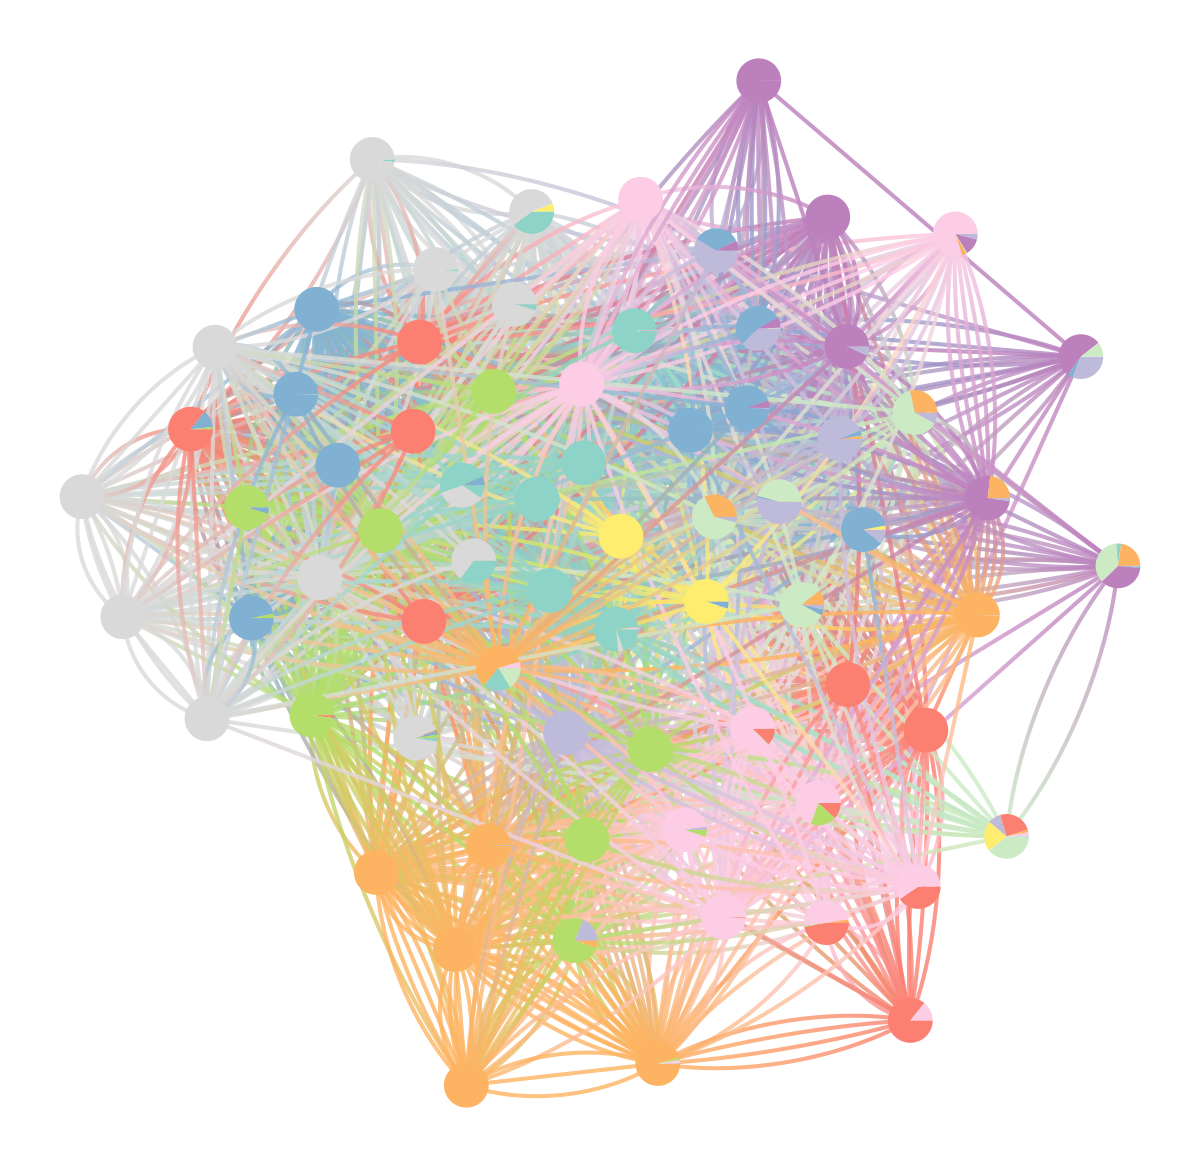

In [18]:
graph.draw()

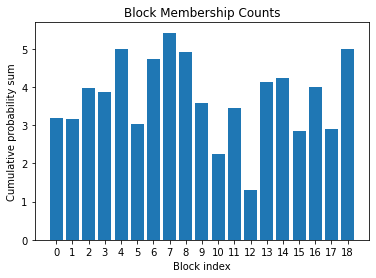

In [19]:
graph.plot_posterior_props()

## Train classifier

In [35]:
classifier = graph.sample_classifier_mala(1000, step_scaling=0.1, verbose=True)

100%|██████████| 1000/1000 [00:01<00:00, 857.06it/s]Sample accept ratio: 47.9%
Train. set accuracy: 42.25352112676056%



## Interpret results

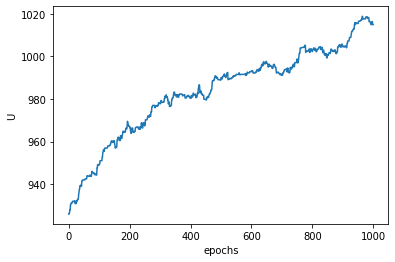

In [36]:
classifier.plot_U()

In [37]:
classifier.thin_samples()

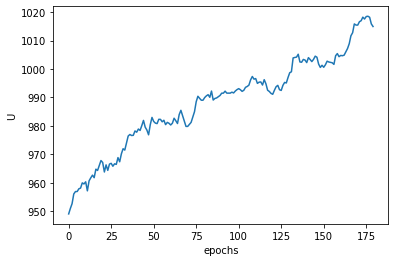

In [38]:
classifier.plot_U()

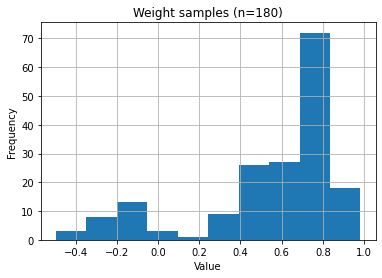

In [39]:
classifier.plot_sample_histogram()

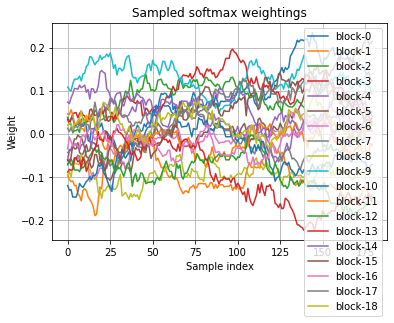

In [40]:
classifier.plot_sample_history()

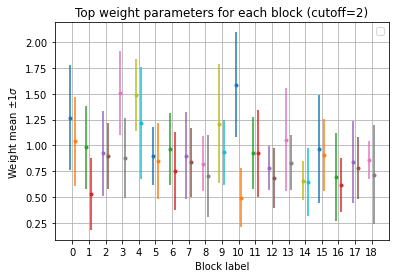

In [41]:
names = graph.get_feature_names()
classifier.plot_block_principal_dims(names, cutoff=2)

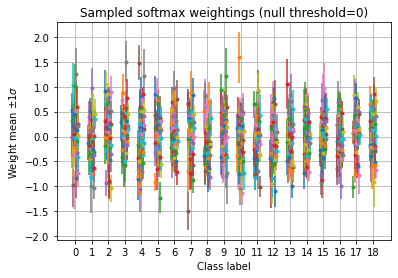

In [42]:
names = graph.get_feature_names()
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0)